In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn as svm
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, RocCurveDisplay



<a id="Initiating the cards"></a>
## 1. Making the card object(Run this cell to make the card ranks)

In [2]:
class Card:
    def __init__(self,suit,score):
        self.suit = suit
        self.score = score
        if score == 14:
            rank = 'Ace'

        elif score == 2:
            rank = '2'

        elif score == 3:
            rank = '3'

        elif score == 4:
            rank = '4'

        elif score == 5:
            rank = '5'

        elif score == 6:
            rank = '6'

        elif score == 7:
            rank = '7'

        elif score == 8:
            rank = '8'

        elif score == 9:
            rank = '9'

        elif score == 10:
            rank = '10'

        elif score == 11:
            rank ='Jack'

        elif score == 12:
            rank ='Queen'

        else:
            rank = 'King'
        self.rank = rank
        self.name = self.rank +' '+ self.suit
        """ Class Features:
        Rank: This is the name of the placement within the rankings that the card is
        Suit: This is the class of the card fitted toward the four basic suits
        Name: This is the common name of the card that is often made of the Rank and the Suit
        Score: This is the point value that a card can be referred to

        """

    def get_name(self):
        return self.name
        """
        Returns:
        Name of the Card
        """

    def get_rank(self):
        return self.rank
        """
        Returns:
        Rank of the Card
        """

    def get_suit(self):
        return self.suit
        """
        Returns:
        Suit of the Card
        """

    def get_score(self):
        return self.score
        """
        Returns:
        Score of the Card
        """


In [3]:
suits = ['Hearts','Diamonds','Clubs','Spades']
rank_card = [14,2,3,4,5,6,7,8,9,10,11,12,13]


<a id="Makeing the Deck"></a>
## 1.2. Making the deck in a class to use later(Run this cell to make the deck)

In [4]:
class Deck:
    def __init__(self):
        tdeck = []
        for s in suits:
            for r in rank_card:
                tcard = Card(s,r)
                tdeck.append(tcard)
        self.cards = tdeck
        """ Class Features:
        Cards: Creates a list of all 52 possible card objects within a standard game
        """
        

<a id="Inital code of the Poker game"></a>
## 1.3 In this cell it will initialize the hand when you use it later, It will also begin the round of each game(run this cell to continue)

In [5]:
#### INITIAL CODE DO NOT CHANGE
class Poker:
    def __init__(self,Deck):
        self.deck = Deck
        """Class Features
        Deck: This takes in a pre-generated deck class object
        """
        

    def Draw_hand(self):
        """
        This draws the hand cards

        Args:
            None

        Returns:
            List of 2 random card objects

        """
        hand = []
        index = []
        ind = random.randint(0,51)
        Card1 = self.deck.cards[ind]
        hand.append(Card1)
        ind2 = random.randint(0,51)
        while ind == ind2:
            ind2 = random.randint(0,51)

        Card2 = self.deck.cards[ind2]
        hand.append(Card2)
        index.append(ind)
        index.append(ind2)
        hand_name=[]
        for aa in hand:
            hand_name.append(aa.get_name())
        return hand

    def display_hand(self,hand):
        """
        This is used to display the names of the card objects in a list

        Args:
            Hand

        Returns:
            List of Names of card objects in the Hand
        """
        hand_name = []
        for aa in hand:
            hand_name.append(aa.get_name())
        return hand_name

    def Draw_Flop(self):
        """
        Makes a list of the first 3 card objects that represent the community cards

        Args:
            None

        Returns:
            House
        """
        house = []
        c1 = random.randint(0,51)
        c2 = random.randint(0,51)
        c3 = random.randint(0,51)
        while c1 == c2 or c2 == c3 or c1 == c3:
            c1 = random.randint(0,51)
            c2 = random.randint(0,51)
            c3 = random.randint(0,51)
        F1 = self.deck.cards[c1]
        F2 = self.deck.cards[c2]
        F3 = self.deck.cards[c3]
        house.append(F1)
        house.append(F2)
        house.append(F3)
        return house

    def Begin_Game(self):
        """
        Makes a game and then draws the hand and house(flop)

        Args:
            None

        Returns:
            House, Hand
        """
        house = self.Draw_Flop()
        hand = self.Draw_hand()
        for bb in hand:
            if bb in house:
                house = self.Draw_Flop()
        
        return(house, hand)

    def Draw_turn(self,house,hand):
        """
        Takes the hand and house lists and then updates the house with an additional house card

        Args:
            House, Hand

        Returns:
            Turn
        """
        turn = []
        c4 = random.randint(0,51)
        F4 = self.deck.cards[c4]
        turn.append(F4)
        for dd in turn:
            if dd in house or dd in hand:
                turn[0] = self.deck.cards[random.randint(0,51)]
        return turn  

    def Begin_Game2(self,house,hand):
        """
        Takes the hand and house of the previous Begin_Game method and draws the turn

        Args:
            House, Hand

        Returns:
            House, Hand
        """
        turn = self.Draw_turn(house,hand)
        turn_card = turn[0]
        house.append(turn_card)
        
        return house, hand

    def Draw_river(self,house,hand):
        """
        Takes the hand and house and then updates the house list with a new fifth card

        Args:
            House, Hand

        Returns:
            River
        """
        river = []
        c5 = random.randint(0,51)
        F5 = self.deck.cards[c5]
        river.append(F5)
        for ee in river:
            if ee in house or ee in hand:
                river[0] = self.deck.cards[random.randint(0,51)]
        return river

    def Begin_Game3(self,house,hand):
        """
        Takes the hand and house of the previous Begin_Game2 method and draws the river

        Args:
            House, Hand

        Returns:
            House, Hand
        """
        river = self.Draw_river(house,hand)
        river_card = river[0]
        house.append(river_card)
        
        return house, hand

##### INITIAL CODE DO NOT CHANGE

In [6]:
# MY EDIT

class Poker_predictor:
    def __init__(self,card1,card2,flop1,flop2,flop3):
        self.card1 = card1
        self.card2 = card2
        self.flop1 = flop1
        self.flop2 = flop2
        self.flop3 = flop3

        hand = [card1, card2]
        house = [flop1, flop2, flop3]

    def display_hand(self):
        return hand

    def display_house(self):
        return house

    def Begin_Game(self):
        # They do an analysis here and ask them to fold if they need to
        return(house, hand)
        pass

    def Draw_Turn(self, turn):
        self.turn = turn
        house.append(turn)
        return (house, hand)

    def Turn_Update(self):
        # Another analysis to see if they keep playing or fold
        pass

    def Draw_River(self,river):
        self.river = river
        house.append(river)
        return (house, hand)

    def Game_update(self):
        # Final Analysis based on the point system/winning hand functions
        
        pass
        

<a id="Finding the Hand"></a>
## 2. In this cell bellow it takes in the hond and the house from the classes above and it finds what the Suit and the rank of the card is and organizes the cards to know what of the 10 hands you have.

In [7]:
class Poker_Hand:
    def __init__(self,hand,house):
        self.hand = hand
        self.house = house
        """
        Class Features:

        Hand: This is the hand list created from a poker class object
        House: This is the house list created from any point in the poker class object
        """

    # RUN THIS FIRST BEFORE IDENTIFYING CARDS!!!#
    def combine_cards(self):
        """
        This takes the house and hand lists and combines them into a single list of card objects

        Args:
            None

        Returns:
            Cards
        """
        cards = []
        for a in self.hand:
            cards.append(a)
        for aa in self.house:
            cards.append(aa)
        return cards

    def identify(self,cards):
        """
        This takes the combined cards list and then identifies the best possible hand that can be played based on the house
        and hand lists and sets that as a class feature, ranking

        Args:
            Cards

        Returns:
            self.ranking
        """
        rns = []
        dia = []
        spa = []
        club = []
        hrt = []
        score = []
        
        for a in cards:
            s = a.get_score()
            score.append(s)
            sr = (a.get_suit(),a.get_score())
            rns.append(sr)
            if a.get_suit() == 'Diamonds':
                dia.append(a)
            elif a.get_suit() == 'Clubs':
                club.append(a)
            elif a.get_suit() == 'Hearts':
                hrt.append(a)
            else:
                spa.append(a)

        sorted_score = sorted(score)

        check_flush = 0
        while check_flush == 0:
            
            if len(dia) > 4 or len(club) > 4 or len(spa) > 4 or len(hrt) > 4:
                Flush = 1
                check_flush = 1
                
            else:
                Flush = 0
                check_flush = 1

        check_str = 0
        while check_str == 0:
            count = 1
            Straight_set = set(sorted_score)
            Str_lst = sorted(list(Straight_set))
            for i in range(len(Straight_set)-4):
                if Str_lst[i] == Str_lst[i+1]-1 == Str_lst[i+2]-2 == Str_lst[i+3]-3 == Str_lst[i+4]-4:
                    count += 1
            if count >= 2:
                Straight = 1
                check_str = 1
                
            else:
                Straight = 0
                check_str = 1
                
        check_FS = 0
        while check_FS == 0:
            if Flush == 1 and Straight == 1:
                FS_list = sorted_score.copy()
                FS_set = set(FS_list)
                if 14 in FS_set and 13 in FS_set and 12 in FS_set and 11 in FS_set and 10 in FS_set:
                    Royal = 1
                    StrFsh = 1
                    check_FS = 1
                    
                else:
                    Royal = 0
                    StrFsh = 1
                    check_FS = 1
                    
            else:
                StrFsh = 0
                check_FS = 1

        
        check_FofK = 0
        while check_FofK == 0:
            count = 1
            FofK_score = sorted_score.copy()
            counter = Counter(FofK_score)
            mode = counter.most_common(1)
            mode_FofK = mode[0][0]
            for bb in range(len(sorted_score)-1):
                if mode_FofK == sorted_score[bb] == sorted_score[bb+1]:
                    count += 1
            if count >= 4:
                FofK = 1
                check_FofK = 1
                
            else:
                FofK = 0
                check_FofK=1

        
        check_FH = 0
        while check_FH == 0:
            count = 1
            FH_score = sorted_score.copy()
            counter = Counter(FH_score)
            mode = counter.most_common(1)
            mode_FH = mode[0][0]
            for cc in range(len(score)-1):
                if mode_FH == sorted_score[cc] == sorted_score[cc+1]:
                    count +=1
            if count >= 3:
                FH_3ofK = 1
            else:
                FH_3ofK = 0
            count2= 1
            for i in range(0,mode[0][1]):
                FH_score.remove(mode_FH)
            for dd in range(len(FH_score)-1):
                if FH_score[dd] == FH_score[dd+1]:
                    count2 += 1
            if count2 >= 2:
                FH_2ofK = 1
            else:
                FH_2ofK = 0

            if FH_2ofK == 1 and FH_3ofK == 1:
                FH = 1
                check_FH=1
                
            else:
                FH = 0
                check_FH=1

        check_TofK = 0
        while check_TofK == 0:
            count = 1
            TofK_score = sorted_score.copy()
            counter = Counter(TofK_score)
            mode = counter.most_common(1)
            for ee in range(len(sorted_score)-1):
                if mode[0][0]==sorted_score[ee] == sorted_score[ee+1]:
                    count +=1
            if count >= 3:
                TofK = 1
                check_TofK = 1
                
            else:
                TofK = 0
                check_TofK = 1
                
        check_TPair = 0
        while check_TPair == 0:
            counter = Counter(sorted_score)
            mode = counter.most_common(1)
            TPair_list = sorted_score.copy()
            count = 1
            for ff in range(len(sorted_score)-1):
                if TPair_list[ff] == TPair_list[ff+1]:
                    count += 1
            if count >= 2:
                TP1 = 1
            else:
                TP1 = 0
            if TP1 == 1:
                for gg in range(mode[0][1]):
                    TPair_list.remove(mode[0][0])
            else:
                TPair = 0
                break
            count2 = 1
            for hh in range(len(TPair_list)-1):
                if TPair_list[hh] == TPair_list[hh+1]:
                    count2 +=1
            if count2 >= 2:
                TP2 = 1
            else:
                TP2 = 0
            if TP1 == 1 and TP2 == 1:
                TPair = 1
                check_TPair = 1
                
            else:
                TPair = 0
                check_TPair = 1

        check_Pair = 0
        while check_Pair == 0:
            count = 1
            for jj in range(len(sorted_score)-1):
                if sorted_score[jj] == sorted_score[jj+1]:
                    count += 1
            if count >=2:
                Pair = 1
                check_Pair = 1
                
            else:
                Pair = 0
                check_Pair = 1

        check_HC = 0
        while check_HC == 0:
            HC_Card = max(sorted_score)
            HC = 1
            
            check_HC = 1

        if StrFsh == 1 and Royal == 1:
            self.ranking = "Royal Flush"
            
        elif StrFsh == 1 and Royal == 0:
            self.ranking = "Straight Flush"
            
        elif FofK == 1:
            self.ranking ='Four of a Kind'
            
        elif FH == 1:
            self.ranking = 'Full House'
            
        elif Flush == 1:
            self.ranking ='Flush'
            
        elif Straight == 1:
            self.ranking = 'Straight'
            
        elif TofK == 1:
            self.ranking ='Three of a Kind'
            
        elif TPair == 1:
            self.ranking = "Two Pair"
            
        elif Pair == 1:
            self.ranking = "Pair"
            
        else:
            self.ranking = "High Card"
            
    
    def ranking_score(self):
        """
        This takes the ranking feature and then indicates the placement of the ranking among the possible hands with an integer
        value

        Args:
            None
            
        Returns:
            self.rank_score
        """
        ranking = self.ranking
        hand_rankings = {
        "Royal Flush": 1,
        "Straight Flush":2,
        "Four of a Kind":3,
        "Full House":4,
        "Flush":5,
        "Straight": 6,
        "Three of a Kind":7,
        "Two Pair": 8,
        "Pair": 9,
        "High Card": 10
        }
        self.rank_score = hand_rankings.get(self.ranking)
        return self.rank_score
        
    def determine_move(self):
        """
        Takes the rank_score feature and then decides whether to fold or check based on a pre-decided threshold of hand rankings

        Args:
            None

        Returns:
            String
        """
        return "check" if self.rank_score <= 8 else "fold"
    
    

In [8]:
Test_Deck = Deck()
Test_Poker = Poker(Test_Deck)
house, hand = Test_Poker.Begin_Game()
house, hand = Test_Poker.Begin_Game2(house,hand)
house, hand = Test_Poker.Begin_Game3(house,hand)
Pkr = Poker_Hand(hand,house)
Pkr_cards = Pkr.combine_cards()
Pkr.identify(Pkr_cards)
Pkr.ranking_score()


9

<a id="pca-review"></a>
## 2.2 Below is the function to simulate the game(run cell to continue

In [9]:

def simulate_game(sim):
    house, hand = sim.Begin_Game()
    house, hand = sim.Begin_Game2(house,hand)
    house, hand = sim.Begin_Game3(house,hand)
    d_hand = sim.display_hand(hand) 
    d_house = sim.display_hand(house)
    Pkr = Poker_Hand(hand,house)
    Pkr_cards = Pkr.combine_cards()
    Pkr.identify(Pkr_cards)
    hand = Pkr.ranking
    rank= Pkr.ranking_score()
    move = Pkr.determine_move
    return d_hand,d_house,hand,move,rank

# Initialize the Poker game instance


<a id="pca-review"></a>
## 2.3 This makes a simulate run 100000 times and puts it into a data frame to run later for the machine learning model.(run to continue)

In [10]:
poker_Deck = Deck()

hundered_Poker = Poker(poker_Deck)


# Create lists to store game results
game_results = []

# Run the simulation 100 times
for i in range(100000):
    d_hand, d_house,hand,move,rank = simulate_game(hundered_Poker)
    # Append the results as a dictionary
    game_results.append({'Game': i + 1, 'Hand': d_hand, 'House': d_house,"Poker Hand":hand,"Move":move,"Hand Rank":rank})
df= pd.DataFrame(game_results)
df['Move'] = df['Move'].apply(lambda method: method() if callable(method) else method) 
df['Poker Hand'] = df['Poker Hand'].apply(lambda method: method() if callable(method) else method) 
df

,Game,Hand,House,Poker Hand,Move,Hand Rank
0,1,"[King Diamonds, 4 Clubs]","[9 Clubs, 10 Spades, Ace Diamonds, 2 Diamonds,...",Pair,fold,9
1,2,"[10 Clubs, Ace Hearts]","[6 Diamonds, 8 Spades, King Diamonds, Queen He...",Straight,check,6
2,3,"[2 Diamonds, 9 Spades]","[6 Spades, 6 Hearts, Jack Clubs, Queen Clubs, ...",Pair,fold,9
3,4,"[6 Spades, 9 Hearts]","[7 Spades, 4 Hearts, Jack Clubs, 6 Diamonds, 3...",Pair,fold,9
4,5,"[3 Hearts, 9 Spades]","[Ace Clubs, King Clubs, Ace Diamonds, 2 Diamon...",Two Pair,check,8
...,...,...,...,...,...,...
99995,99996,"[3 Clubs, 9 Hearts]","[2 Diamonds, 4 Diamonds, 5 Clubs, 4 Clubs, 7 C...",Pair,fold,9
99996,99997,"[Ace Clubs, Queen Diamonds]","[5 Hearts, 5 Clubs, 6 Hearts, 3 Diamonds, Quee...",Two Pair,check,8
99997,99998,"[7 Hearts, 7 Diamonds]","[5 Spades, Queen Clubs, 3 Clubs, 6 Clubs, 6 Di...",Two Pair,check,8
99998,99999,"[8 Clubs, 3 Diamonds]","[10 Spades, 6 Hearts, Jack Clubs, 6 Spades, Ac...",Pair,fold,9


<a id="pca-review"></a>
## 3. Modeling 


<a id="pca-review"></a>
## 3.1 Confusion Matrix(run this to see how out model performs)

Dataset after introducing randomness:
Label Distribution in y (Before Split):
Move
0    60603
1    39397
Name: count, dtype: int64
Model Accuracy: 0.9499666666666666


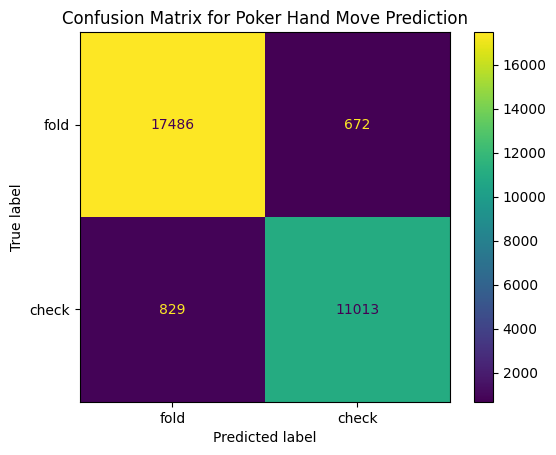

In [11]:



# 1. Add noise to the feature
noise_level = 0.35  # Adjust noise level because there is a difference in hands at the same(ex. King pair is higher than a 2 pair)
df['Hand Rank'] += np.random.normal(0, noise_level, size=df.shape[0])
"""

noise level ajdusted for the variation in same rank hand

"""
# 2. Verify changes
print("Dataset after introducing randomness:")
df.head()
X = df[['Hand Rank']].values # Use Hand Rank as a feature

# Encode 'Move' as binary
y = (df['Move'] == 'check').astype(int)  # 1 for 'check', 0 for 'fold'
"""
makes a training and testing data set to use to train a model and see the predicted move

"""

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Label Distribution in y (Before Split):")
print(y.value_counts())
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fold', 'check'])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix for Poker Hand Move Prediction")
plt.show()

<a id="log regression model"></a>
## 3.2 Logistic Regression Model(Run this to see the model)

Model Performance:
ROC AUC: 0.990
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     18158
           1       0.94      0.93      0.94     11842

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000



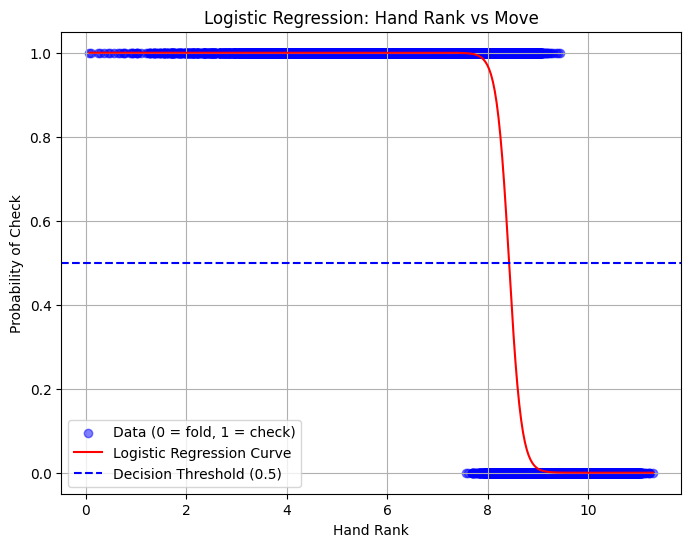

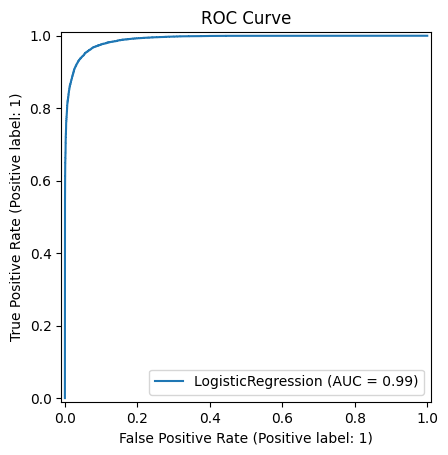

In [14]:

"""

Using a scaler is important to take out the not usless infromation and make the predictions loop correct

Then we plot the Logistic regression and you and see that the thresshold to is around 8 when it decides to fold

The ROC curve shows how our model produced true positive and false positives

The model performance also shows with how the accuacy is 95%

"""
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("Model Performance:")
print(f"ROC AUC: {roc_auc:.3f}")
print(classification_report(y_test, y_pred))

# Generate predictions for plotting
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # Create a range of hand ranks
X_range_scaled = scaler.transform(X_range)
y_range_prob = model.predict_proba(X_range_scaled)[:, 1]  # Probability of 'check'

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Data (0 = fold, 1 = check)", alpha=0.5,color = "blue")
plt.plot(X_range, y_range_prob, color='red', label="Logistic Regression Curve")
plt.axhline(0.5, color='blue', linestyle='--', label="Decision Threshold (0.5)")
plt.title("Logistic Regression: Hand Rank vs Move")
plt.xlabel("Hand Rank")
plt.ylabel("Probability of Check")
plt.legend()
plt.grid()
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

<a id="pca-review"></a>
## 4 Final simulation For 1 round of poker r

In [ ]:
poker_Deck1 = Deck()

Poker1 = Poker(poker_Deck1)


# Create lists to store game results
game_results = []
d_hand1, d_house1,hand1,move1,rank1=simulate_game(Poker1)
def predict_move(hand_rank, model, scaler):
    """
    Predicts the probability and class for a given hand rank.

    Parameters:
        hand_rank (float): The hand rank to predict.
        model (LogisticRegression): Trained logistic regression model.
        scaler (StandardScaler): Fitted scaler for feature scaling.

    Returns:
        dict: Predicted class and probability.
    """
    # Scale the input
    hand_rank_scaled = scaler.transform([[hand_rank]])
    
    # Get probability and class prediction
    probability = model.predict_proba(hand_rank_scaled)[0, 1]  # Probability of 'check'
    prediction = model.predict(hand_rank_scaled)[0]            # Predicted class (0 or 1)
    
    # Map prediction to labels
    label = 'check' if prediction == 1 else 'fold'
    
    return {
        'Hand Rank': hand_rank,
        'Predicted Move': label,
        'Probability of Check': probability
    }

# Example usage

result = predict_move(rank1, model, scaler)
print(f"With your hand being {d_hand1} and the house being {d_house1}{result}")

_References_
[1]OpenAI. (2024). ChatGPT-3.5. Accessed from https://chat.openai.com/ on Nov 17, 2024. Prompt chain:{‘What are some ways that I can model logistic regression, Why is the Xtest data not working’; ‘I used this because I wanted a Idea on another model to use, Also for some reason my testing data was not working’; ‘policy may evolve since generative ai rapidly evolving’;}